In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

## Get data for total us population

#### CASES

In [2]:
normalization_factor = 5000000

In [3]:
# GET TOTAL NEW CASES FOR US
cases_full = pd.read_csv('../data/Covid/covid_confirmed_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
cases_only = cases_full.iloc[:,4:]
cases_only = cases_only.sum() 
cases_only_new = cases_only.diff()[1:]
cases_only_new = cases_only_new.astype('int')
new_cases = cases_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_cases_normalized = new_cases_non.apply(lambda x: (x/population)*normalization_factor)

#### DEATHS

In [4]:
# GET TOTAL NEW CASES FOR US
deaths_full = pd.read_csv('../data/Covid/covid_deaths_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
deaths_only = deaths_full.iloc[:,4:]
deaths_only = deaths_only.sum() 
deaths_only_new = deaths_only.diff()[1:]
deaths_only_new = deaths_only_new.astype('int')
new_deaths = deaths_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_deaths_normalized = new_deaths_non.apply(lambda x: (x/population)*normalization_factor)

## Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
- Start your data from the first day of infections in US. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths.  
- Aim to predict 1 week in advance. Use older data to validate your models. Use Root Mean Square Error (RMSE) to see the evaluation.  
- Describe the trends as compared to other countries.

In [5]:
display(new_cases)
display(new_deaths)

1/23/20          0
1/24/20          1
1/25/20          0
1/26/20          3
1/27/20          1
             ...  
11/7/20     114596
11/8/20     105055
11/9/20     128470
11/10/20    139094
11/11/20    151499
Length: 294, dtype: int32

1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
1/27/20        0
            ... 
11/7/20      904
11/8/20      438
11/9/20      911
11/10/20    1296
11/11/20    1457
Length: 294, dtype: int32

In [6]:
days_since_first = []
i = 0
for x in new_cases.index:
    days_since_first += [i]
    i+=1
days_since_first

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [7]:
arr = np.asarray(days_since_first)
reshaped_days_since_first = arr.reshape(-1,1)
X = reshaped_days_since_first
print(X)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [8]:
Y = new_cases.values.reshape(-1, 1) 
print(Y)

[[     0]
 [     1]
 [     0]
 [     3]
 [     1]
 [     0]
 [     1]
 [     0]
 [     1]
 [     1]
 [     0]
 [     2]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     1]
 [     0]
 [     1]
 [     0]
 [     0]
 [     0]
 [     0]
 [     1]
 [     0]
 [     0]
 [     3]
 [     0]
 [     0]
 [     1]
 [     0]
 [     2]
 [     1]
 [     2]
 [    11]
 [     6]
 [    22]
 [    19]
 [    35]
 [    66]
 [    49]
 [   145]
 [   116]
 [   259]
 [   285]
 [   282]
 [   397]
 [   601]
 [   652]
 [   801]
 [   962]
 [  1571]
 [  2912]
 [  5022]
 [  4916]
 [  7317]
 [  7287]
 [ 10113]
 [ 10019]
 [ 14698]
 [ 16489]
 [ 17520]
 [ 20393]
 [ 18798]
 [ 21919]
 [ 23045]
 [ 26386]
 [ 28720]
 [ 35204]
 [ 33680]
 [ 24712]
 [ 29854]
 [ 30284]
 [ 32614]
 [ 33845]
 [ 33147]
 [ 31076]
 [ 27254]
 [ 24929]
 [ 25374]
 [ 30120]
 [ 32550]
 [ 30933]
 [ 27741]
 [ 25121]
 [ 26493]
 [ 25487]
 [ 28775]
 [ 31627]
 [ 37421]
 [ 33968]
 [ 25483]
 [ 22763]
 [ 24106]
 [ 27921]
 [ 28976]
 [ 33092]


In [9]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = regressor.predict(X)
print(y_pred)

[[-3.75755153e+03]
 [-3.49292693e+03]
 [-3.22830233e+03]
 [-2.96367773e+03]
 [-2.69905313e+03]
 [-2.43442853e+03]
 [-2.16980393e+03]
 [-1.90517933e+03]
 [-1.64055473e+03]
 [-1.37593013e+03]
 [-1.11130553e+03]
 [-8.46680927e+02]
 [-5.82056327e+02]
 [-3.17431727e+02]
 [-5.28071269e+01]
 [ 2.11817473e+02]
 [ 4.76442073e+02]
 [ 7.41066673e+02]
 [ 1.00569127e+03]
 [ 1.27031587e+03]
 [ 1.53494047e+03]
 [ 1.79956507e+03]
 [ 2.06418967e+03]
 [ 2.32881427e+03]
 [ 2.59343887e+03]
 [ 2.85806347e+03]
 [ 3.12268807e+03]
 [ 3.38731267e+03]
 [ 3.65193727e+03]
 [ 3.91656187e+03]
 [ 4.18118647e+03]
 [ 4.44581107e+03]
 [ 4.71043567e+03]
 [ 4.97506027e+03]
 [ 5.23968487e+03]
 [ 5.50430947e+03]
 [ 5.76893407e+03]
 [ 6.03355867e+03]
 [ 6.29818327e+03]
 [ 6.56280787e+03]
 [ 6.82743247e+03]
 [ 7.09205707e+03]
 [ 7.35668167e+03]
 [ 7.62130627e+03]
 [ 7.88593087e+03]
 [ 8.15055547e+03]
 [ 8.41518007e+03]
 [ 8.67980468e+03]
 [ 8.94442928e+03]
 [ 9.20905388e+03]
 [ 9.47367848e+03]
 [ 9.73830308e+03]
 [ 1.0002927

In [11]:
print(regressor.coef_)

[[264.62460006]]


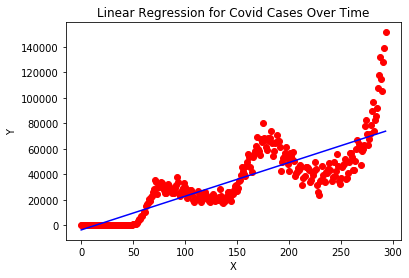

In [12]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.title('Linear Regression for Covid Cases Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
r2_score(Y,y_pred)